In [1]:
pip install Scikit-Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Scikit-Fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=212336d202e75daa04439cba74c1e59bd9989cd0e41407422251c0a82fb1aac1
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built Scikit-Fuzzy


In [2]:
#khai bao cac ham thu vien
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.dag import antichains
from networkx.algorithms.bipartite import projection
from skfuzzy.control.controlsystem import Consequent
import math


<ipython-input-3-31583be40105>:49: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha =0.1)
<ipython-input-3-31583be40105>:50: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha =0.1)
<ipython-input-3-31583be40105>:51: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha =0.1)


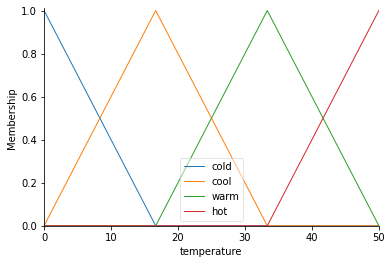

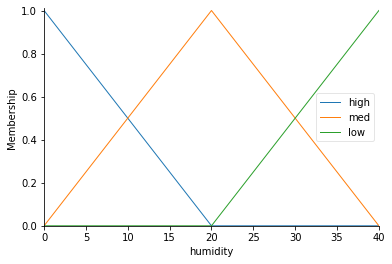

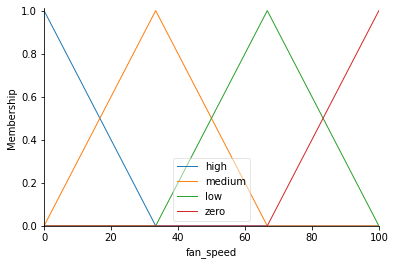

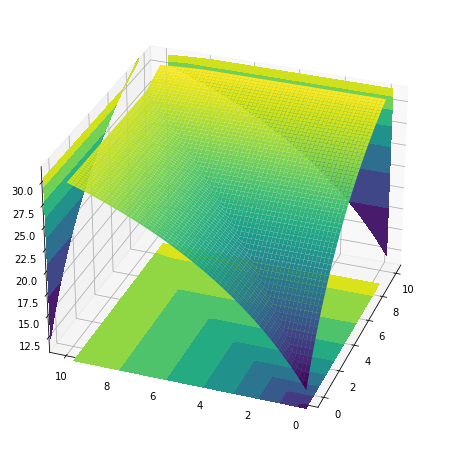

In [3]:
#Temperature Controller
universe1 = np.linspace(0,50,61)
universe2 = np.linspace(0,40,61)
universe3 = np.linspace(0,100,61)

#Tao 3 bien fuzzy
temperature = ctrl.Antecedent(universe1,'temperature')
humidity = ctrl.Antecedent(universe2,'humidity')
fan_speed = ctrl.Consequent(universe3,'fan_speed')

name1 =['cold','cool','warm','hot']
name2 =['high','med','low']
name3 =['high','medium','low','zero']

temperature.automf(names = name1)
humidity.automf(names = name2)
fan_speed.automf(names = name3)

temperature.view()
humidity.view()
fan_speed.view()

rule1 = ctrl.Rule((temperature['hot'] & humidity['high'])|(temperature['hot']& humidity['med'])|(temperature['hot']& humidity['low'])|(temperature['warm']& humidity['med'])|(temperature['warm']& humidity['low']),fan_speed['zero'])

rule2 = ctrl.Rule((temperature['cold']& humidity['high']),fan_speed['high'])

rule3 = ctrl.Rule((temperature['cool']&humidity['high'])|(temperature['cold']& humidity['med'])|(temperature['cold']&humidity['low']), fan_speed['medium'])

rule4 = ctrl.Rule((temperature['warm']&humidity['high'])|(temperature['cool']&humidity['med'])|(temperature['cool']&humidity['low']), fan_speed['low'])

system = ctrl.ControlSystem(rules=[rule1, rule2,rule3 ])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61+61+1)

upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['temperature'] = x[i,j]
    sim.input['humidity'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['fan_speed']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection= '3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)

csit = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha =0.1)
csit = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha =0.1)
csit = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha =0.1)
ax.view_init(30,200)

<ipython-input-4-f11b19fe438e>:46: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha =0.1)
<ipython-input-4-f11b19fe438e>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha =0.1)
<ipython-input-4-f11b19fe438e>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha =0.1)


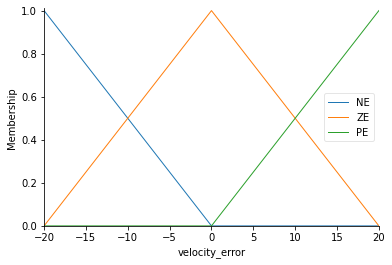

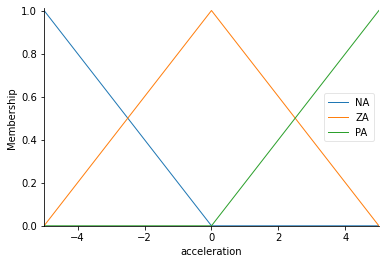

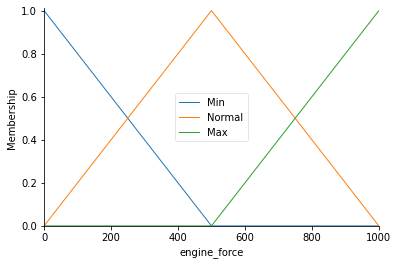

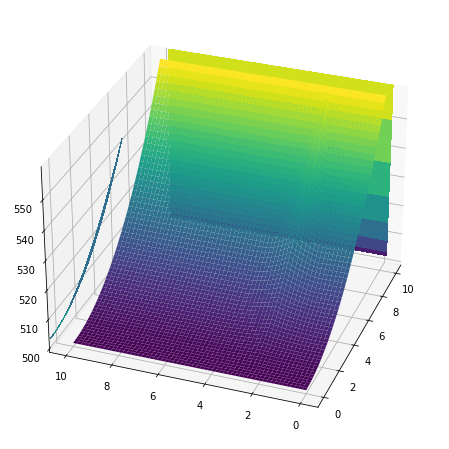

In [4]:
#Automobile cruise control
universe1 = np.linspace(-20,20,61)
universe2 = np.linspace(-5,5,51)
universe3 = np.linspace(0,1000,61)

#Tao 3 bien fuzzy
velocity_error = ctrl.Antecedent(universe1,'velocity_error')
acceleration = ctrl.Antecedent(universe2,'acceleration')
engine_force = ctrl.Consequent(universe3,'engine_force')

name1 = ['NE','ZE','PE']
name2 = ['NA','ZA','PA']
name3 = ['Min','Normal','Max']

#ve membership
velocity_error.automf(names = name1)
acceleration.automf( names = name2)
engine_force.automf( names = name3)

velocity_error.view()
acceleration.view()
engine_force.view()

rule1 = ctrl.Rule((velocity_error['NE']& acceleration['NA'])|(velocity_error['NE']& acceleration['ZA'])|(velocity_error['NE']& acceleration['PA']),engine_force['Min'])
rule2 = ctrl.Rule((velocity_error['ZE']& acceleration['NA'])|(velocity_error['ZE']& acceleration['ZA'])|(velocity_error['ZE']& acceleration['PA']), engine_force['Normal'])
rule3 = ctrl.Rule((velocity_error['PE']& acceleration['NA'])|(velocity_error['PE']& acceleration['ZA'])|(velocity_error['PE']& acceleration['PA']), engine_force['Max'])

system = ctrl.ControlSystem(rules=[rule1, rule2,rule3 ])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61+61+1)

upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['velocity_error'] = x[i,j]
    sim.input['acceleration'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['engine_force']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection= '3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)

csit = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha =0.1)
csit = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha =0.1)
csit = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha =0.1)
ax.view_init(30,200)

<ipython-input-5-a315174e2496>:45: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha =0.1)
<ipython-input-5-a315174e2496>:46: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha =0.1)
<ipython-input-5-a315174e2496>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  csit = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha =0.1)


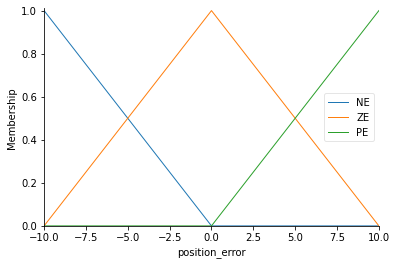

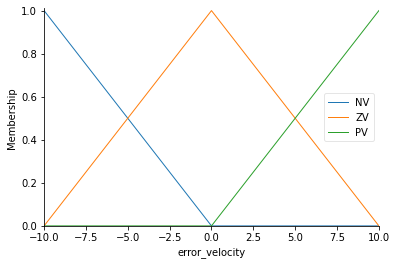

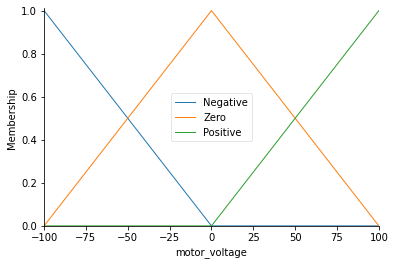

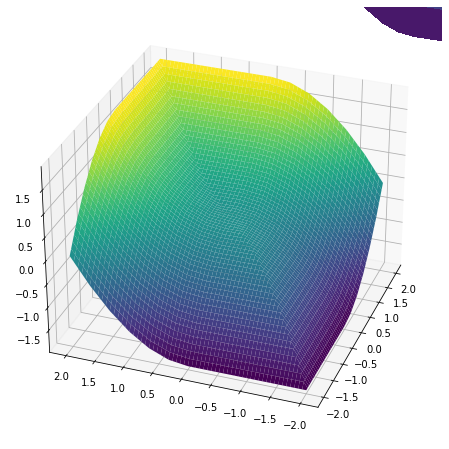

In [5]:
# Controlling dynamics of a servomotor
universe1 = np.linspace(-10,10,61)
universe2 = np.linspace(-10,10,61)
universe3 = np.linspace(-100,100,61)

#Tao 3 bien fuzzy
position_error = ctrl.Antecedent(universe1,'position_error')
error_velocity = ctrl.Antecedent(universe2,'error_velocity')
motor_voltage = ctrl.Consequent(universe3,'motor_voltage')

name1 = ['NE','ZE','PE']
name2 = ['NV','ZV','PV']
name3 = ['Negative','Zero','Positive']

position_error.automf(names = name1)
error_velocity.automf(names = name2)
motor_voltage.automf( names = name3)

position_error.view()
error_velocity.view()
motor_voltage.view()

rule1 = ctrl.Rule((position_error['NE']& error_velocity['NV'])|(position_error['ZE']& error_velocity['NV'])|(position_error['NE']& error_velocity['ZV'])|(position_error['NE']& error_velocity['PV']),motor_voltage['Negative'])
rule2 = ctrl.Rule(position_error['ZE']&error_velocity['ZV'],motor_voltage['Zero'])
rule3 = ctrl.Rule((position_error['PE']& error_velocity['NV'])|(position_error['PE']& error_velocity['ZV'])|(position_error['PE']& error_velocity['PV'])|(position_error['ZE']& error_velocity['PV']),motor_voltage['Positive'])

system = ctrl.ControlSystem(rules=[rule1, rule2,rule3 ])
sim = ctrl.ControlSystemSimulation(system, flush_after_run=61+61+1)

upsampled = np.linspace(-2,2,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['position_error'] = x[i,j]
    sim.input['error_velocity'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['motor_voltage']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection= '3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)

csit = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha =0.1)
csit = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha =0.1)
csit = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha =0.1)
ax.view_init(30,200)